In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
deliveries = pd.read_csv("deliveries.csv")
matches = pd.read_csv("matches.csv")
point_table = pd.read_csv("points_table.csv")

In [3]:
# Check for missing values
print(deliveries.isnull().sum())
print(matches.isnull().sum())
print(point_table.isnull().sum())

match_id                      0
season                        0
start_date                    0
venue                         0
innings                       0
ball                          0
batting_team                  0
bowling_team                  0
striker                       0
non_striker                   0
bowler                        0
runs_off_bat                  0
extras                        0
wides                     25454
noballs                   26063
byes                      26081
legbyes                   25926
penalty                   26118
wicket_type               25390
player_dismissed          25390
other_wicket_type         26118
other_player_dismissed    26118
dtype: int64
season              0
team1               0
team2               0
date                0
match_number        0
venue               0
city                0
toss_winner         0
toss_decision       0
player_of_match     0
umpire1             0
umpire2             0
reserve_umpire     

In [4]:
# Drop duplicates
deliveries = deliveries.drop_duplicates()
matches = matches.drop_duplicates()
point_table = point_table.drop_duplicates()

In [5]:
# Convert date columns to datetime format
matches['date'] = pd.to_datetime(matches['date'])

In [6]:
# Descriptive statistics
print(matches.describe())

       match_number  winner_runs  winner_wickets
count         48.00    24.000000       24.000000
mean          24.50   125.916667        5.916667
std           14.00    82.242968        2.019829
min            1.00     5.000000        1.000000
25%           12.75    69.750000        5.000000
50%           24.50   101.000000        6.000000
75%           36.25   160.000000        7.250000
max           48.00   309.000000        9.000000


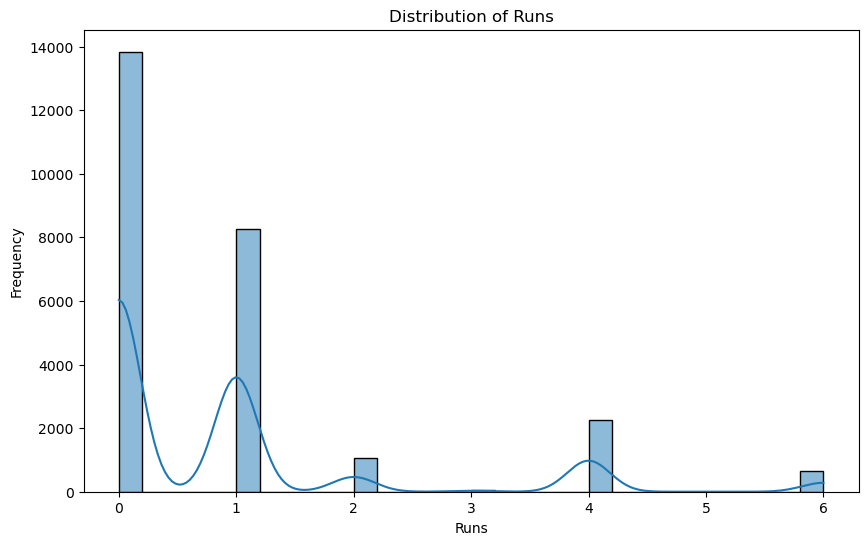

In [7]:
# Visualize the distribution of runs
plt.figure(figsize=(10, 6))
sns.histplot(deliveries['runs_off_bat'], bins=30, kde=True)
plt.title('Distribution of Runs')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.show()

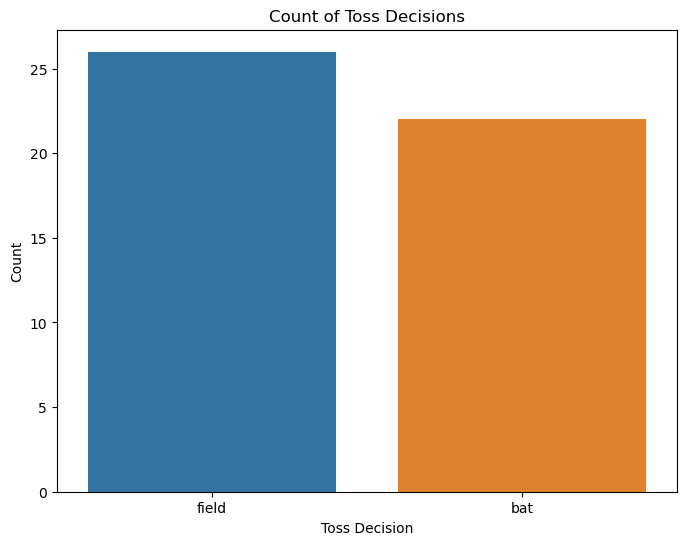

In [8]:
# Explore toss decisions
plt.figure(figsize=(8, 6))
sns.countplot(x='toss_decision', data=matches)
plt.title('Count of Toss Decisions')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.show()

In [9]:
# Calculate Batting Average
deliveries['batting_average'] = deliveries.groupby('striker')['runs_off_bat'].transform('mean')

In [10]:
# Calculate Run Rate
deliveries['run_rate'] = deliveries.groupby('striker')['runs_off_bat'].cumsum() / deliveries.groupby('striker')['ball'].cumsum()

In [11]:
# Calculate Bowling Average
deliveries['bowling_average'] = deliveries.groupby('bowler')['runs_off_bat'].transform('sum') / deliveries.groupby('bowler')['player_dismissed'].transform('count')

In [12]:
# Calculate Economy Rate
deliveries['economy_rate'] = deliveries.groupby('bowler')['runs_off_bat'].cumsum() / (deliveries.groupby('bowler')['ball'].cumsum() / 6)

In [21]:
# Which teams performed the best in terms of wins?
winning_teams = matches['winner'].value_counts()
print("Teams with the most wins:\n", winning_teams)

Teams with the most wins:
 India           10
Australia        9
South Africa     7
New Zealand      5
Pakistan         4
Afghanistan      4
England          3
Bangladesh       2
Netherlands      2
Sri Lanka        2
Name: winner, dtype: int64


In [22]:
# What are the common toss decisions and their impact on the match result?
toss_decision_impact = matches.groupby(['toss_decision', 'winner']).size().unstack(fill_value=0)
print("Toss decision impact on match result:\n", toss_decision_impact)

Toss decision impact on match result:
 winner         Afghanistan  Australia  Bangladesh  England  India  \
toss_decision                                                       
bat                      2          4           0        2      6   
field                    2          5           2        1      4   

winner         Netherlands  New Zealand  Pakistan  South Africa  Sri Lanka  
toss_decision                                                               
bat                      1            0         2             3          2  
field                    1            5         2             4          0  


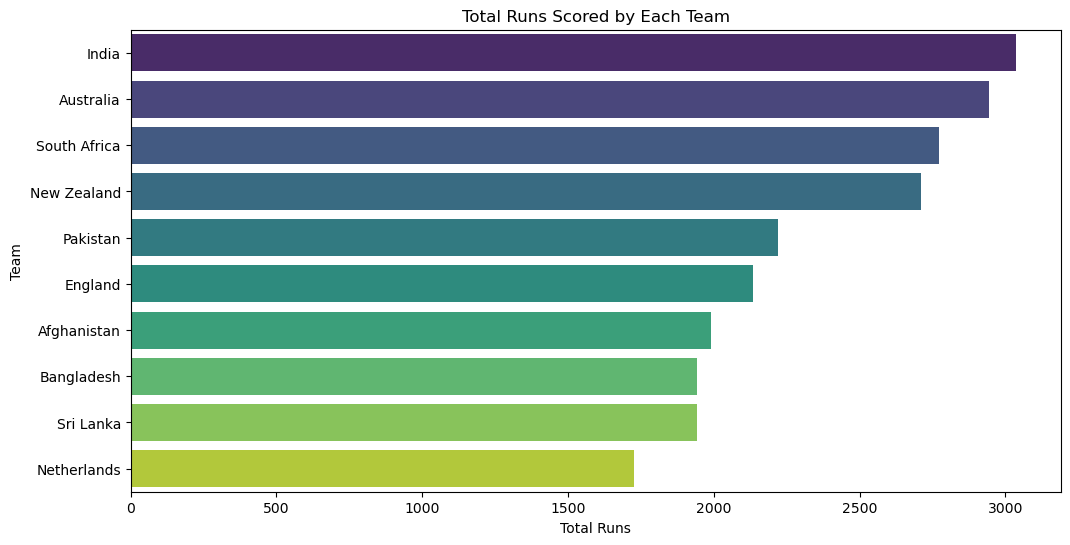

In [15]:
team_runs = deliveries.groupby('batting_team')['runs_off_bat'].sum().reset_index()
team_runs = team_runs.sort_values(by='runs_off_bat', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='runs_off_bat', y='batting_team', data=team_runs, palette='viridis')
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Total Runs')
plt.ylabel('Team')
plt.show()


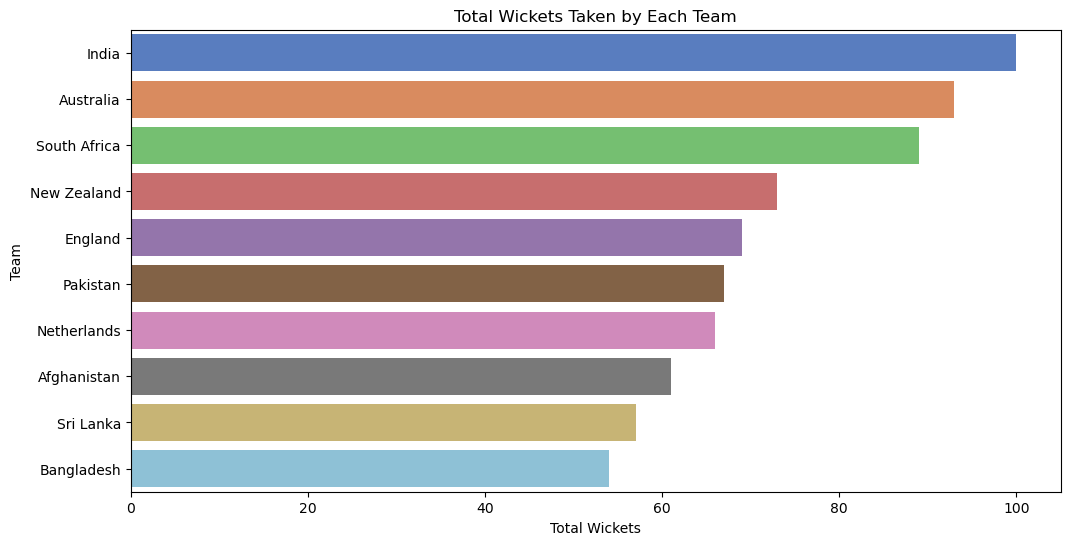

In [16]:
team_wickets = deliveries[deliveries['wicket_type'].notnull()].groupby('bowling_team')['wicket_type'].count().reset_index()
team_wickets = team_wickets.sort_values(by='wicket_type', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='wicket_type', y='bowling_team', data=team_wickets, palette='muted')
plt.title('Total Wickets Taken by Each Team')
plt.xlabel('Total Wickets')
plt.ylabel('Team')
plt.show()


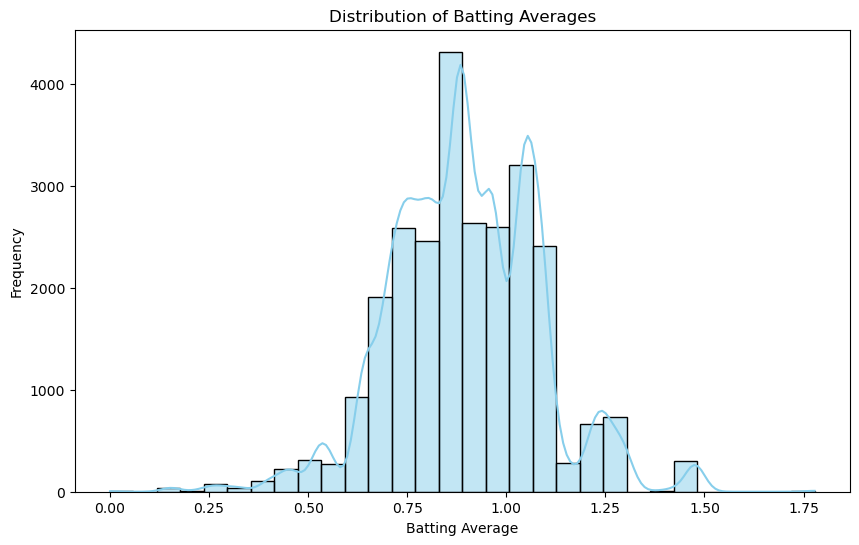

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(deliveries['batting_average'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Batting Averages')
plt.xlabel('Batting Average')
plt.ylabel('Frequency')
plt.show()


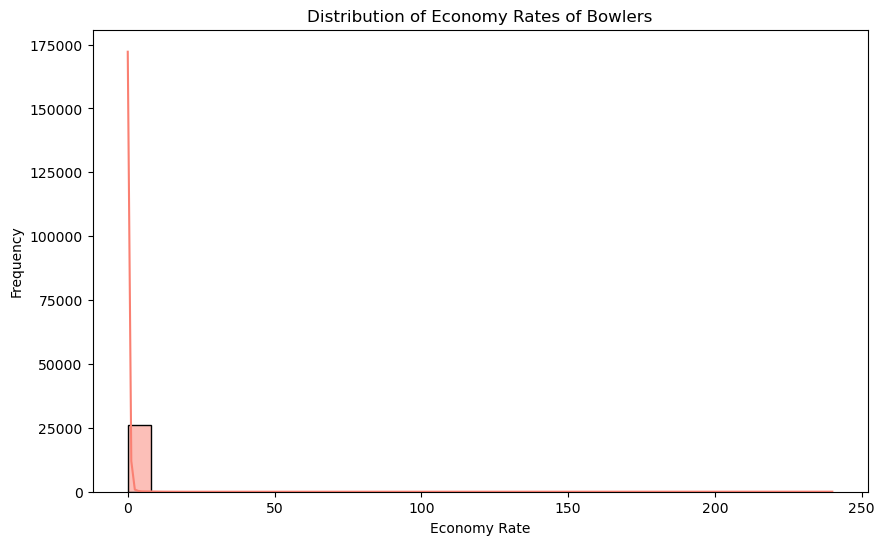

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(deliveries['economy_rate'].dropna(), bins=30, kde=True, color='salmon')
plt.title('Distribution of Economy Rates of Bowlers')
plt.xlabel('Economy Rate')
plt.ylabel('Frequency')
plt.show()


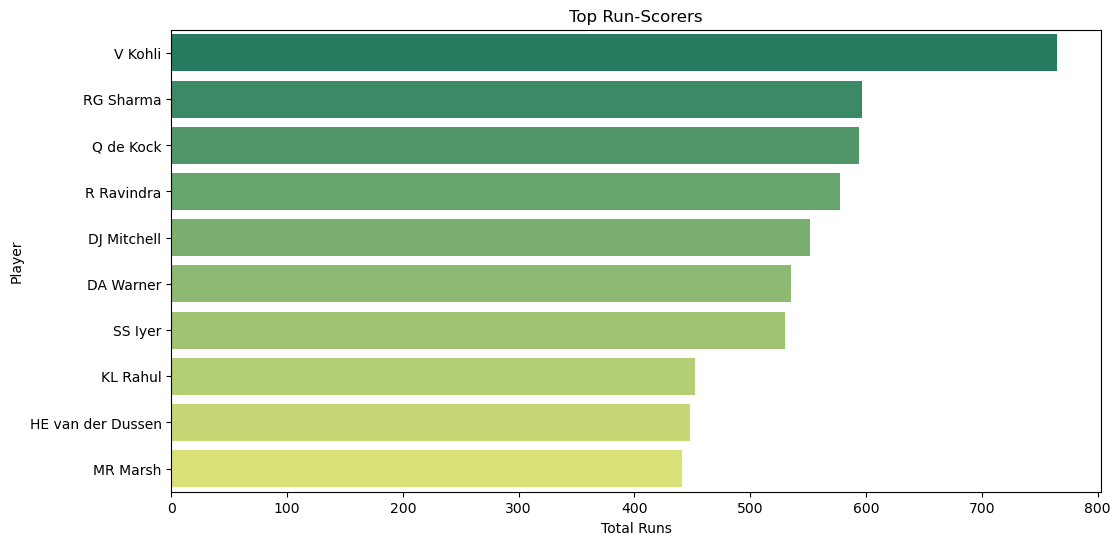

In [23]:
top_run_scorers = deliveries.groupby('striker')['runs_off_bat'].sum().reset_index()
top_run_scorers = top_run_scorers.sort_values(by='runs_off_bat', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='runs_off_bat', y='striker', data=top_run_scorers, palette='summer')
plt.title('Top Run-Scorers')
plt.xlabel('Total Runs')
plt.ylabel('Player')
plt.show()


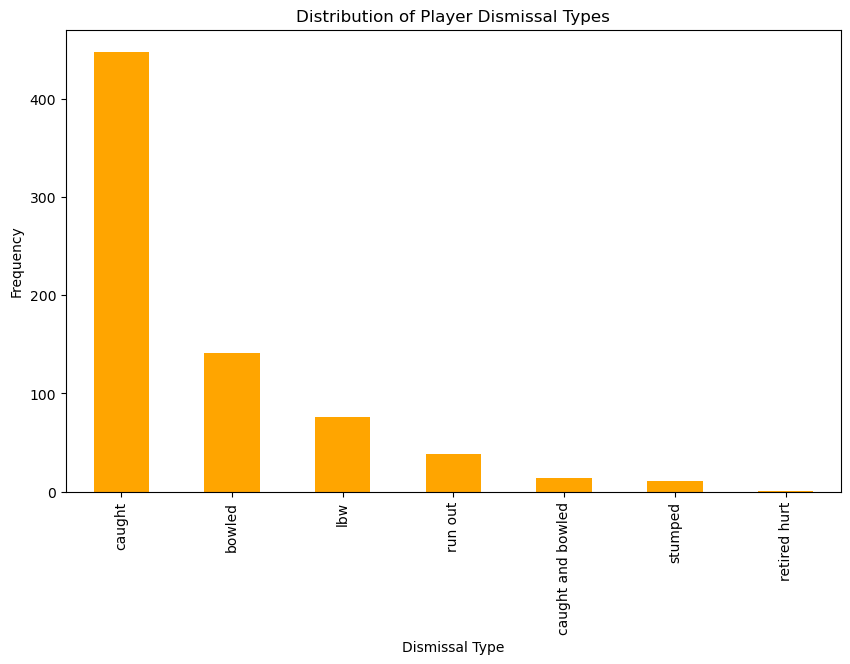

In [24]:
dismissals = deliveries[deliveries['player_dismissed'].notnull()]
dismissal_types = dismissals['wicket_type'].value_counts()

plt.figure(figsize=(10, 6))
dismissal_types.plot(kind='bar', color='orange')
plt.title('Distribution of Player Dismissal Types')
plt.xlabel('Dismissal Type')
plt.ylabel('Frequency')
plt.show()


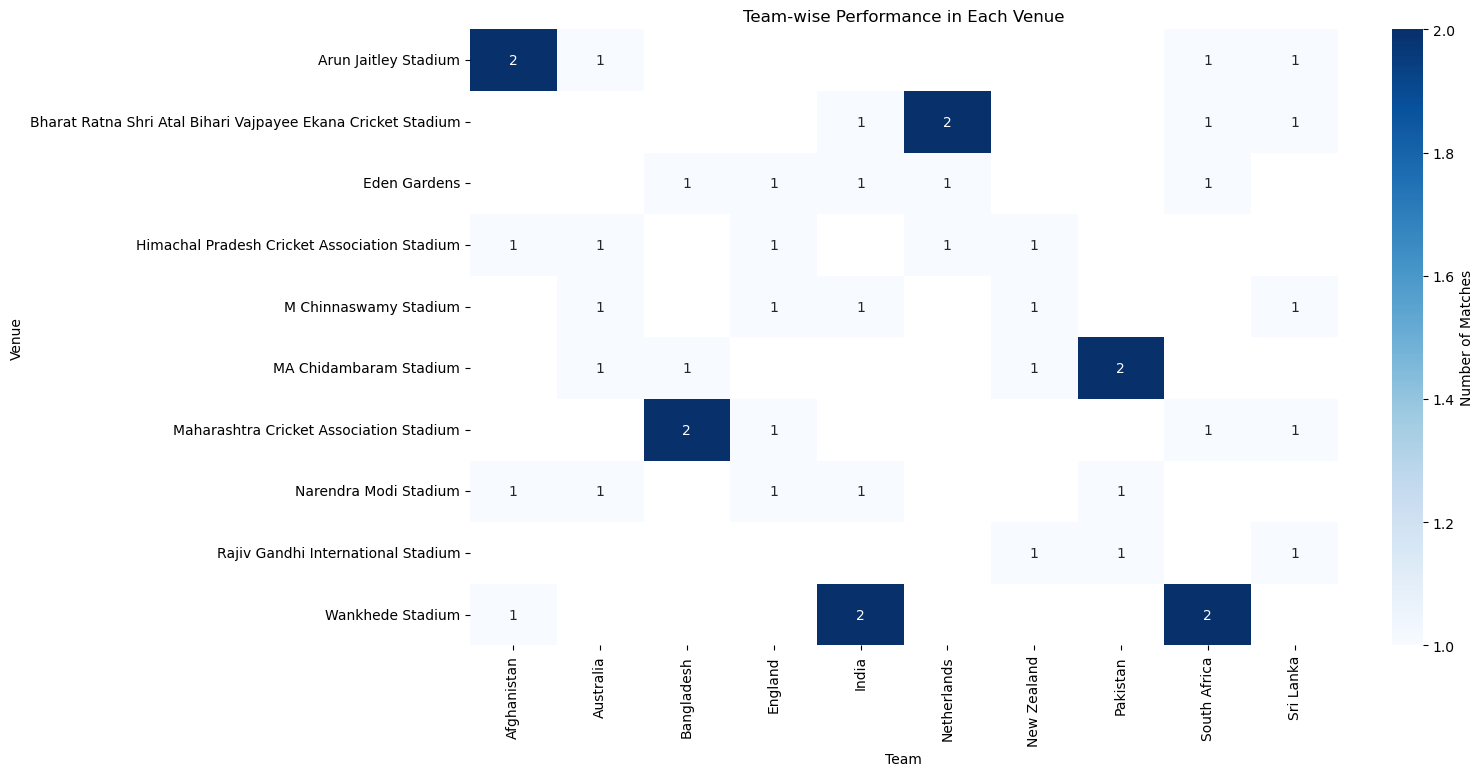

In [29]:
venue_wise_performance = matches.groupby(['venue', 'team1'])['winner'].count().unstack()

plt.figure(figsize=(14, 8))
sns.heatmap(venue_wise_performance, cmap='Blues', annot=True, fmt='g', cbar_kws={'label': 'Number of Matches'})
plt.title('Team-wise Performance in Each Venue')
plt.xlabel('Team')
plt.ylabel('Venue')
plt.show()


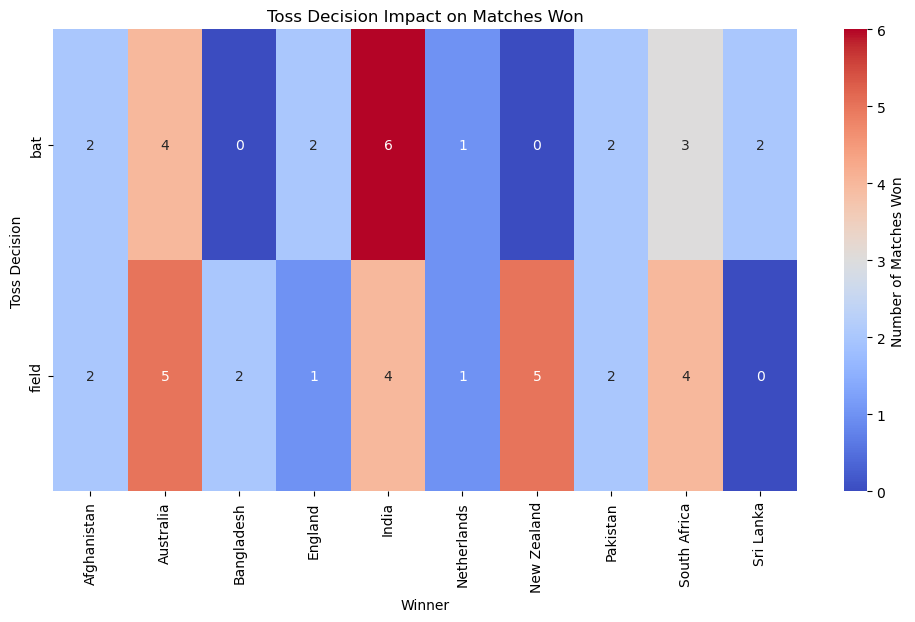

In [30]:
toss_decision_impact = matches.groupby(['toss_decision', 'winner']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(toss_decision_impact, cmap='coolwarm', annot=True, fmt='g', cbar_kws={'label': 'Number of Matches Won'})
plt.title('Toss Decision Impact on Matches Won')
plt.xlabel('Winner')
plt.ylabel('Toss Decision')
plt.show()


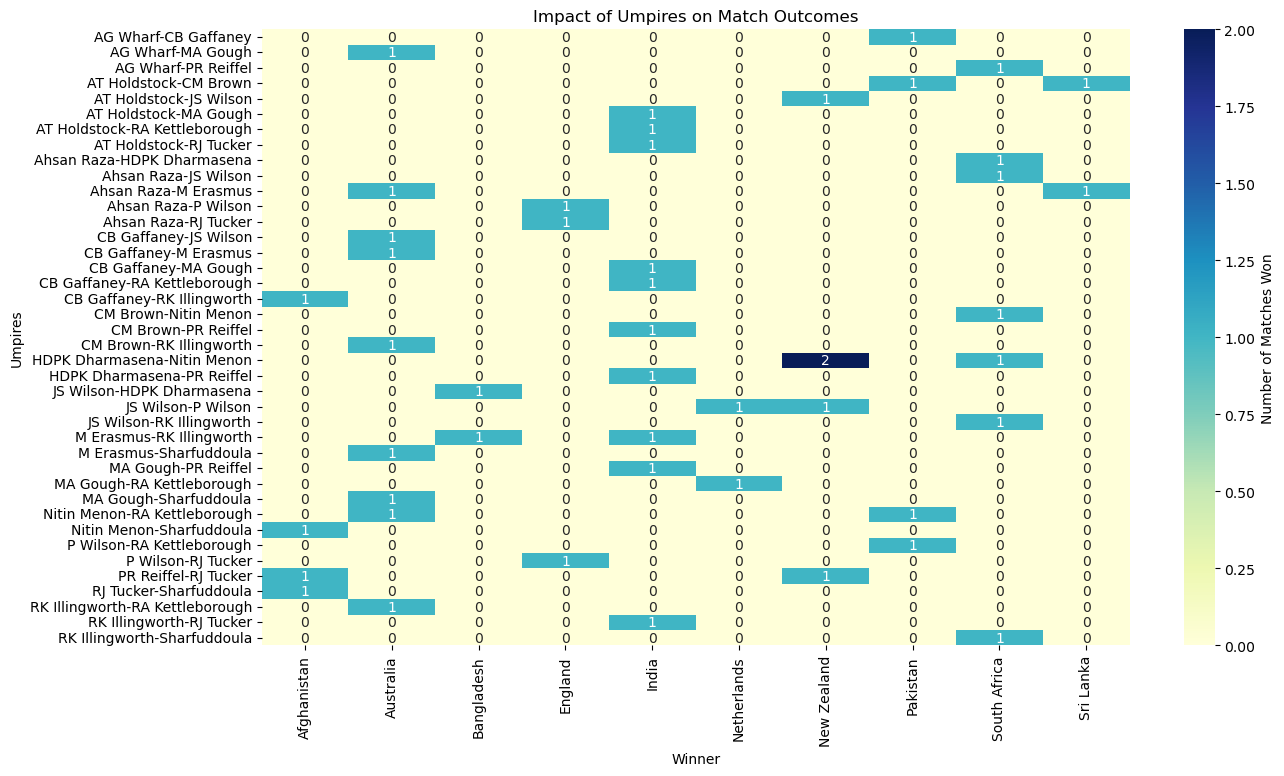

In [32]:
umpire_performance = matches.groupby(['umpire1', 'umpire2', 'winner']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(umpire_performance, cmap='YlGnBu', annot=True, fmt='g', cbar_kws={'label': 'Number of Matches Won'})
plt.title('Impact of Umpires on Match Outcomes')
plt.xlabel('Winner')
plt.ylabel('Umpires')
plt.show()
